In [1]:
   
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
from ipynb.fs.full.Hide import hide_toggle

In [2]:
symbol ="AAPL"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2019-01-01",end="2021-01-01")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]
rsi = talib.RSI(data["Close"])
data


,Date,Open,High,Low,Close
Date,,,,,
2018-12-31,17896.0,38.653761,38.856137,38.153916,38.461140
2019-01-02,17898.0,37.766231,38.731784,37.605305,38.505024
2019-01-03,17899.0,35.106087,35.530346,34.623312,34.669640
2019-01-04,17900.0,35.240192,36.220374,35.062200,36.149662
2019-01-07,17903.0,36.256950,36.288648,35.574236,36.069202
...,...,...,...,...,...
2020-12-24,18620.0,131.124063,133.260869,130.904390,131.773087
2020-12-28,18624.0,133.790085,137.135078,133.310790,136.486053
2020-12-29,18625.0,137.844025,138.582912,134.139554,134.668762


In [3]:
def plot_all(num):
  fig, ax_rsi = plt.subplots()
  fig.set_size_inches((12, 5))

  candlestick_ohlc(ax_rsi,data_frames_separate[num].values,width=0.6, \
                   colorup='green', colordown='red', alpha=0.8)
  #ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
  ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
  ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
  ax_rsi.plot(data.index, rsi, label="rsi")
  ax_rsi.legend()
  date_format = mpl_dates.DateFormatter('%d %b %Y')
  ax_rsi.xaxis.set_major_formatter(date_format)
  fig.autofmt_xdate()
  plt.title(num_name[num])
  fig.tight_layout()
  plt.grid()

#   for level in levels[num]:
#     plt.hlines(level[1],xmin=data_frames_separate[num]['Date'][level[0]],\
#                xmax=max(data_frames_separate[num]['Date']),colors='blue')

# fig = plt.figure()

# ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
# ax_rsi.plot(data.index, [70] * len(data.index), label="overbought")
# ax_rsi.plot(data.index, [30] * len(data.index), label="oversold")
# ax_rsi.plot(data.index, rsi, label="rsi")
#ax_rsi.plot(data["Close"])
#ax_rsi.legend()

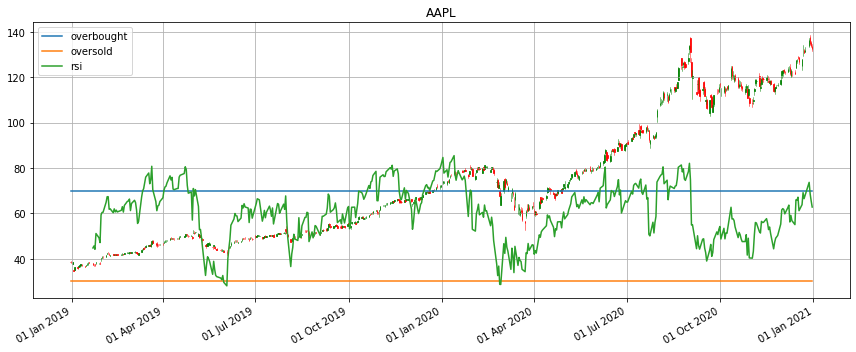

In [4]:
plot_all(0)

In [32]:
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

In [33]:
trades = []
for i in range(1,len(sections)):
    trade = None
    if sections[i-1] == 'oversold' and sections[i] == None:
        trade = True
    if sections[i-1] == 'overbought' and sections[i] == None:
        trade = False
    trades.append(trade)

In [34]:
acp = data['Close'][len(data['Close'])-len(trades):].values
profit = 0
qty = 10
for i in range(len(acp)-1):
    true_trade = None
    if acp[i] < acp[i+1]:
        true_trade = True
    elif acp[i] > acp[i+1]:
        true_trade = False
    if trades[i] == true_trade:
        profit += abs(acp[i+1] - acp[i]) * qty
    elif trades[i] != true_trade:
        profit += -abs(acp[i+1] - acp[i]) * qty

In [23]:
print(profit)

-29679.59945678711


In [3]:
# def rsi_test():
#     # Window length for moving average
#     window_length = 14

#     # Dates
#     start = dt.datetime(2019, 1, 1)
#     end = dt.datetime(2020, 1, 1)

#     # Get data
#     try:
#         data = pdr.DataReader('FB', 'yahoo', start, end)
#         # Get just the close
#         close = data['Adj Close']
#         # Get the difference in price from previous step
#         delta = close.diff()
#         # Get rid of the first row, which is NaN since it did not have a previous
#         # row to calculate the differences
#         delta = delta[1:]
#     except ConnectionError:
#         print("ConnectionError")

#     # Make the positive gains (up) and negative gains (down) Series
#     up, down = delta.copy(), delta.copy()
#     up[up < 0] = 0
#     down[down > 0] = 0

#     # Calculate the EWMA # this style is for older pandas version  virtual env do this with pandas 0.15!
#     #roll_up1 = pd.stats.moments.ewma(up, window_length)
#     #roll_down1 = pd.stats.moments.ewma(down.abs(), window_length)
    
#     roll_up1 = pd.ewma(up, window_length)
#     roll_down1 = pd.ewma(down.abs(), window_length)
    

#     # Calculate the RSI based on EWMA
#     RS1 = roll_up1 / roll_down1
#     RSI1 = 100.0 - (100.0 / (1.0 + RS1))

#     # Calculate the SMA
#     roll_up2 = pd.rolling_mean(up, window_length)
#     roll_down2 = pd.rolling_mean(down.abs(), window_length)

#     # Calculate the RSI based on SMA
#     RS2 = roll_up2 / roll_down2
#     RSI2 = 100.0 - (100.0 / (1.0 + RS2))

#     # Compare graphically
#     plt.figure()
#     RSI1.plot()
#     RSI2.plot()
#     plt.legend(['RSI via EWMA', 'RSI via SMA'])
#     plt.show()